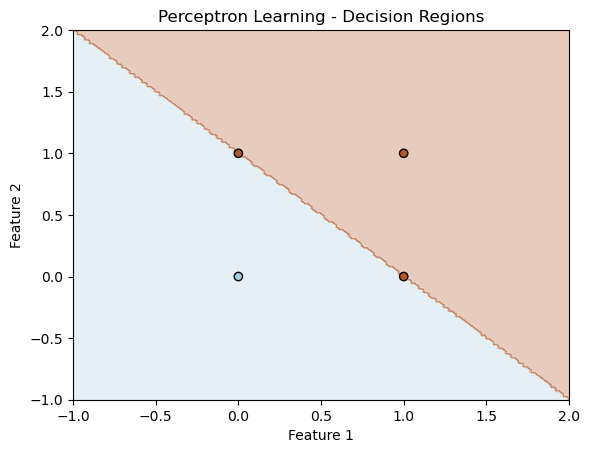

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple perceptron learning algorithm
def perceptron(X, y, lr=0.1, epochs=10):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        for xi, target in zip(X, y):
            linear_output = np.dot(xi, weights) + bias
            y_pred = 1 if linear_output >= 0 else 0
            update = lr * (target - y_pred)
            weights += update * xi
            bias += update
    return weights, bias

# Plot decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    linear_output = np.dot(grid, weights) + bias
    Z = (linear_output >= 0).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Learning - Decision Regions')
    plt.show()

if __name__ == "__main__":
    # Example dataset: OR logic gate
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([0, 1, 1, 1])

    weights, bias = perceptron(X, y)
    plot_decision_boundary(X, y, weights, bias)
